In [53]:
# İlgili kütüphaneler import edilir

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [54]:
# Veri setini okumak
df = pd.read_csv("train.csv",delimiter=",")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
df = df.drop(columns="Id")

In [56]:
#Toplam satır ve sütun sayısına bakmak
df.shape

(1460, 80)

In [57]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df_test,n):
    eksik_değerler = df_test.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df,20)

              Eksik Değerler  Eksik Değerler Yüzdesi
PoolQC                  1453               99.520548
MiscFeature             1406               96.301370
Alley                   1369               93.767123
Fence                   1179               80.753425
MasVnrType               872               59.726027
FireplaceQu              690               47.260274
LotFrontage              259               17.739726
GarageYrBlt               81                5.547945
GarageCond                81                5.547945
GarageType                81                5.547945
GarageFinish              81                5.547945
GarageQual                81                5.547945
BsmtExposure              38                2.602740
BsmtFinType2              38                2.602740
BsmtCond                  37                2.534247
BsmtQual                  37                2.534247
BsmtFinType1              37                2.534247
MasVnrArea                 8                0.

In [58]:
# Toplam kaç tane eksik değer var
df.isnull().sum().sum()

7829

In [59]:
# eksik verilerin tümü için nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df):
    # sıfır ile doldur
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

    # ortalama ile doldur
    #df[''] = df[''].fillna(df[''].mean())

    # medyan ile doldur
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

    # mod ile doldur
    df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

    return df
df = eksik_verileri_doldur(df)

df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [60]:
garage_features = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for column in garage_features:
    df[column] = df[column].fillna("NA")
    
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

In [61]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_features:
    df[column] = df[column].fillna("NA") 

In [62]:
df["Fence"] = df["Fence"].fillna("NA")
df["FireplaceQu"] = df["FireplaceQu"].fillna("NA")
df["PoolQC"] = df["PoolQC"].fillna("NA")
df["MiscFeature"] = df["MiscFeature"].fillna("NA")
df["Alley"] = df["Alley"].fillna("NA")
df["MasVnrType"] = df["MasVnrType"].fillna("NA")

In [63]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


In [64]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
df[numerical_features_1].head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [65]:
# yıl bilgisini içeren değişkenlerin listesini tek tek bakarak da kolayca bulabiliriz ya da aşağıdaki gibi bir mantık de kullanabiliriz
year_feature = [feature for feature in numerical_features_1 if 'Yr' in feature or 'Year' in feature]

year_feature


# yıl değişkenlerini görelim
# df[year_feature].head()

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [66]:
numerical_features_2 = [i for i in numerical_features_1 if i not in year_feature]

print('Number of numerical variables remaining: ', len(numerical_features_2))

Number of numerical variables remaining:  33


In [67]:
discrete_features=[feature for feature in numerical_features_2 if len(df[feature].unique())<25]

print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 17


In [68]:
# Sayısal alanlarımızın icindeki tekil değer sayılarını görüyoruz, bu şekilde de discrete mi continuous mu anlayabiliriz
[print(feature, len(df[feature].unique())) for feature in numerical_features_2 ]

MSSubClass 15
LotFrontage 110
LotArea 1073
OverallQual 10
OverallCond 9
MasVnrArea 327
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
SalePrice 663


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [69]:
continuous_feature=[feature for feature in numerical_features_2 if feature not in discrete_features]

print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 16


In [70]:
# sayısal sürekli değişkenleri görelim
df[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


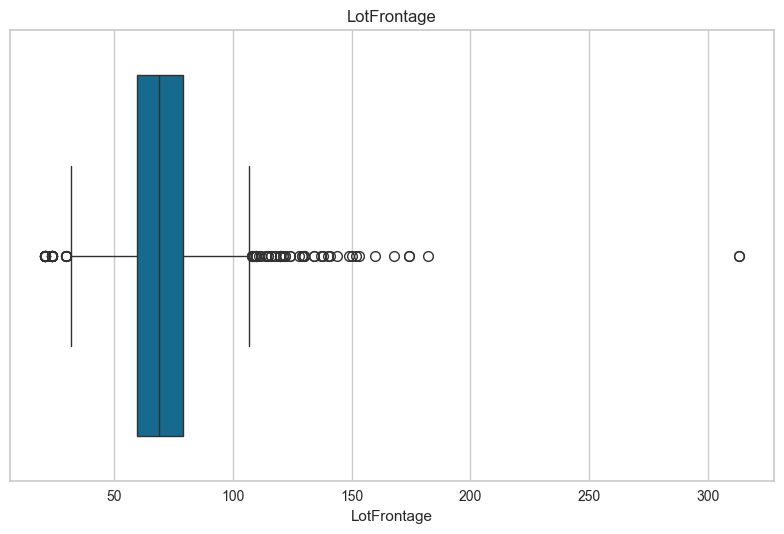

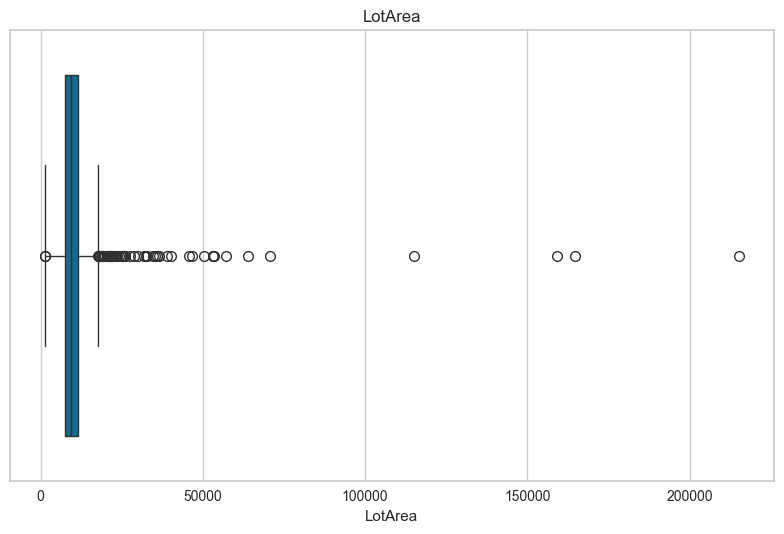

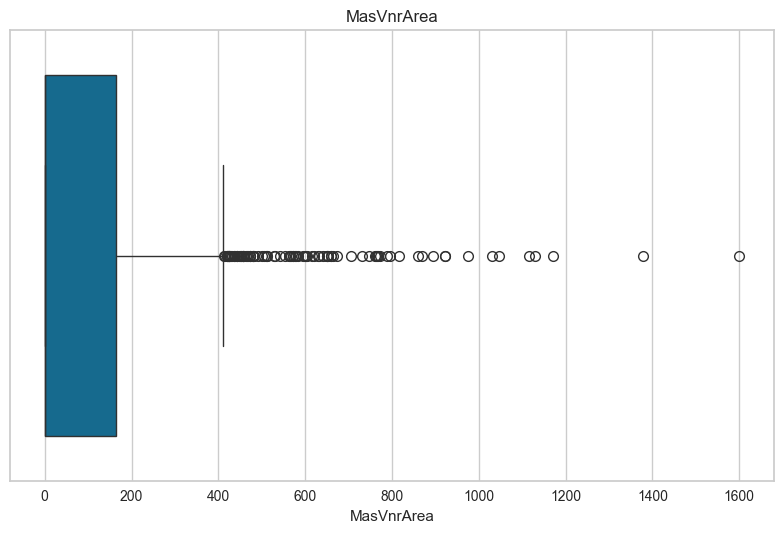

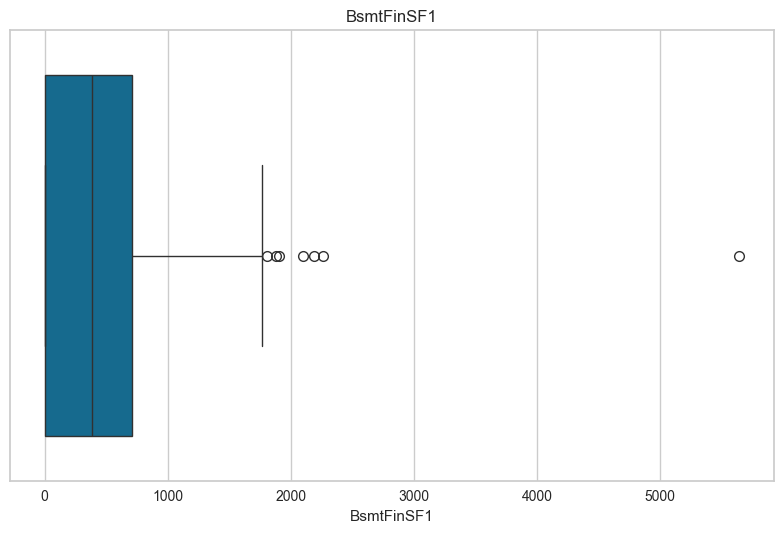

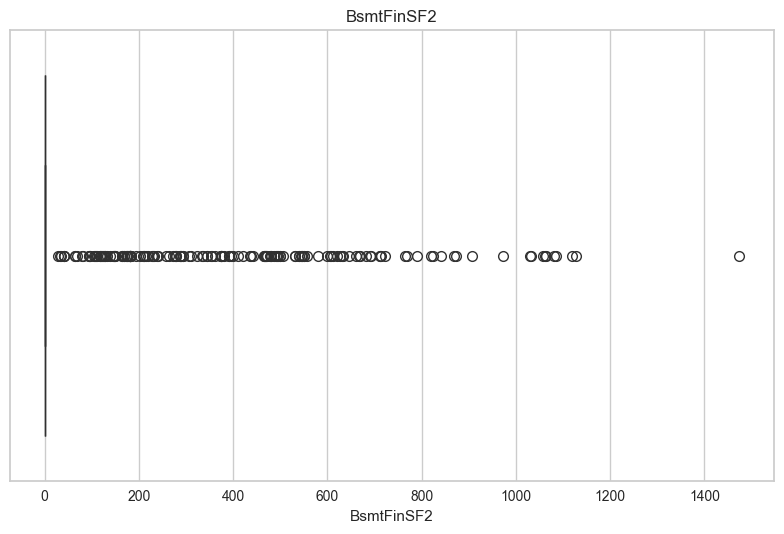

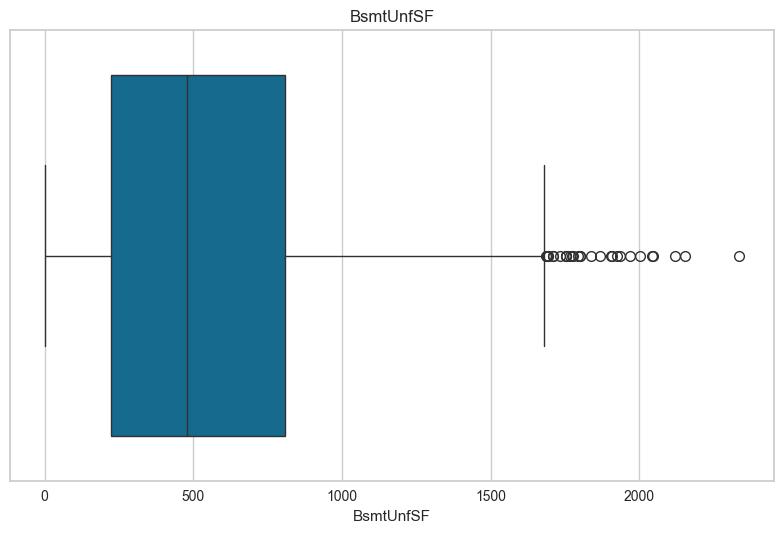

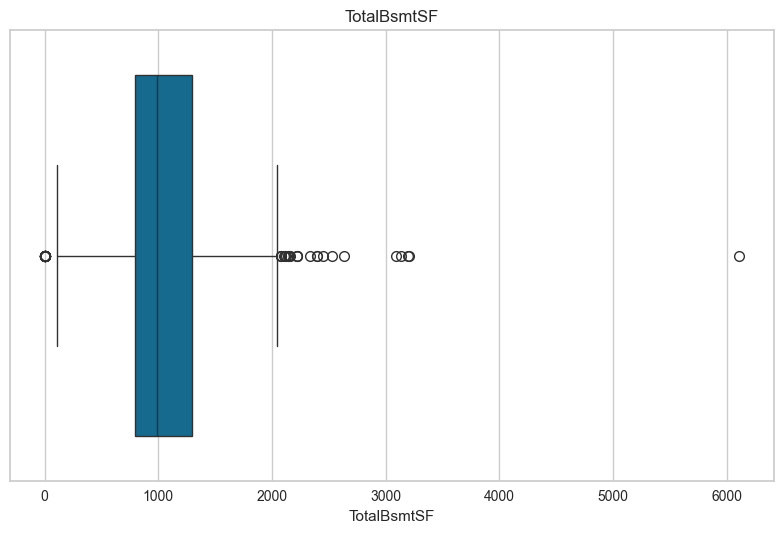

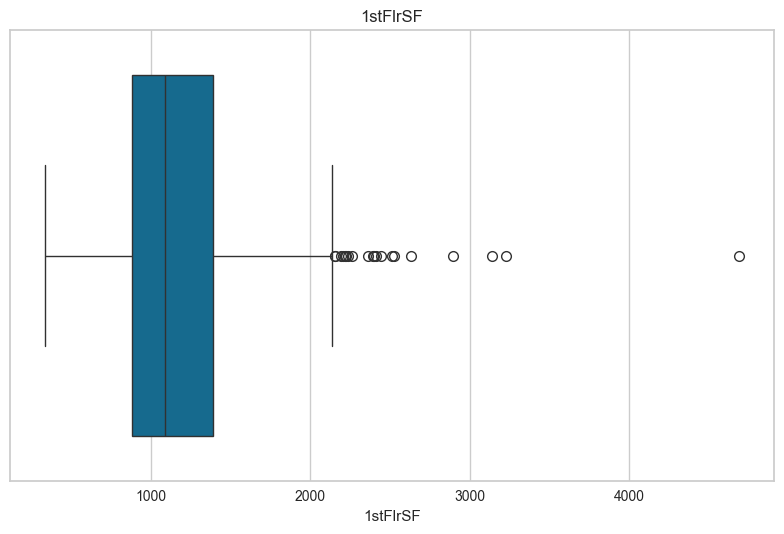

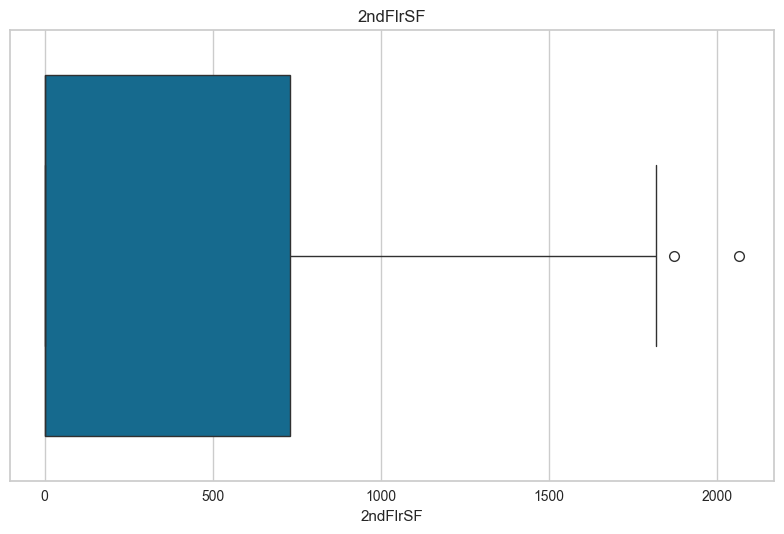

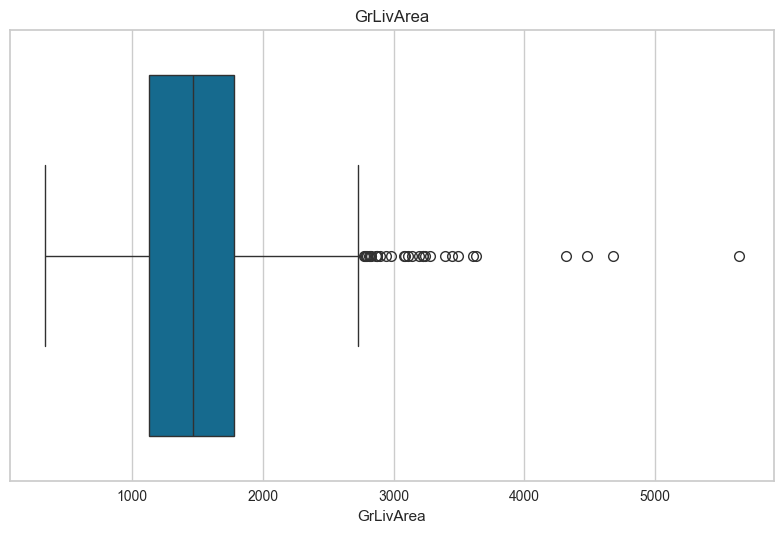

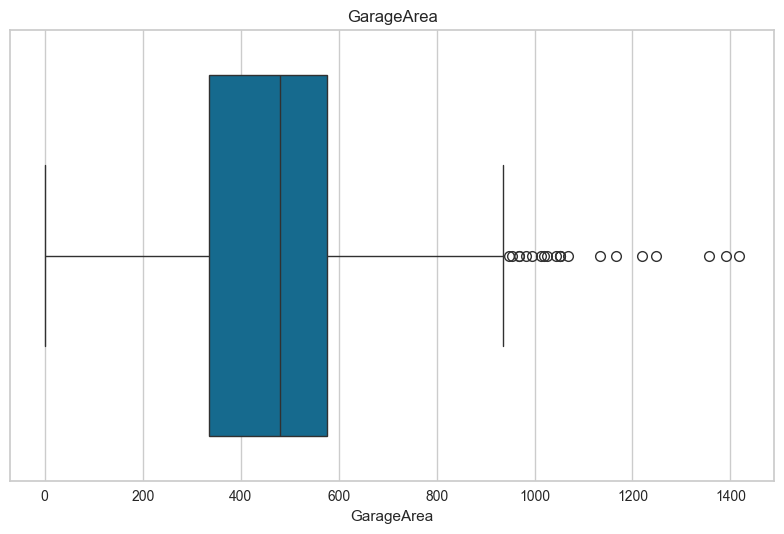

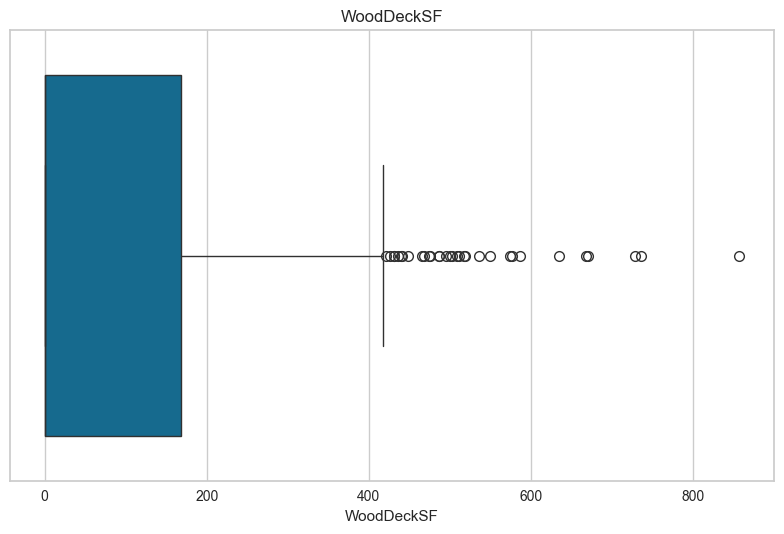

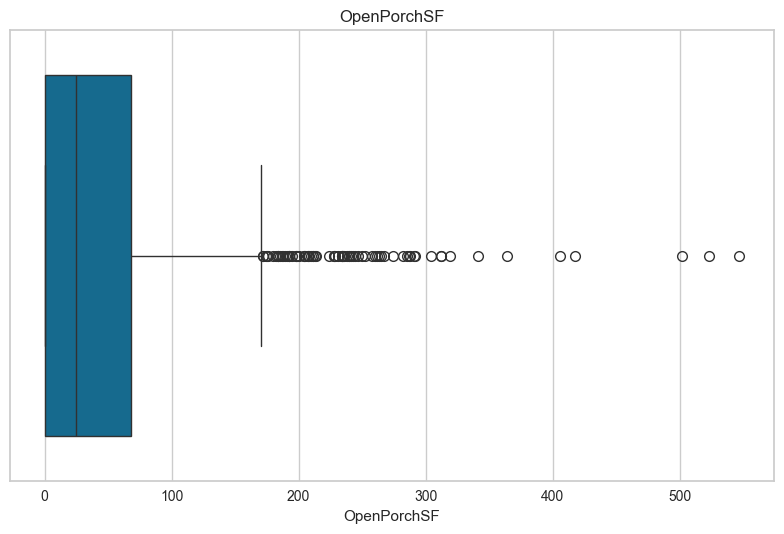

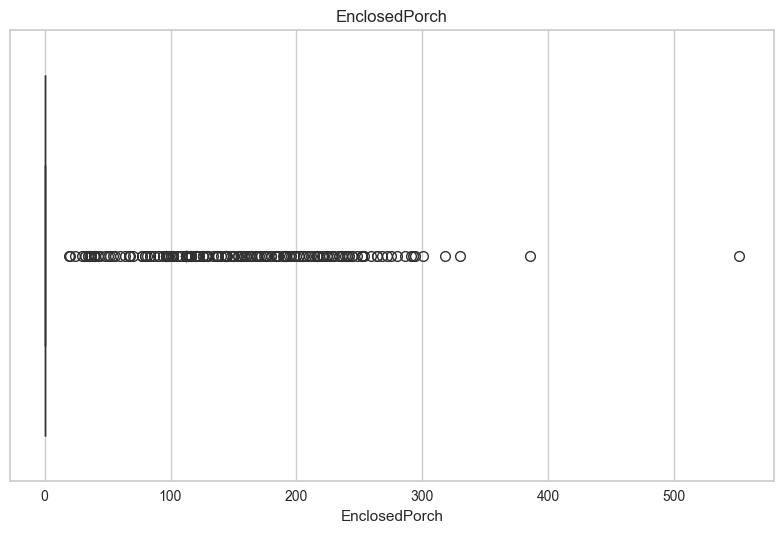

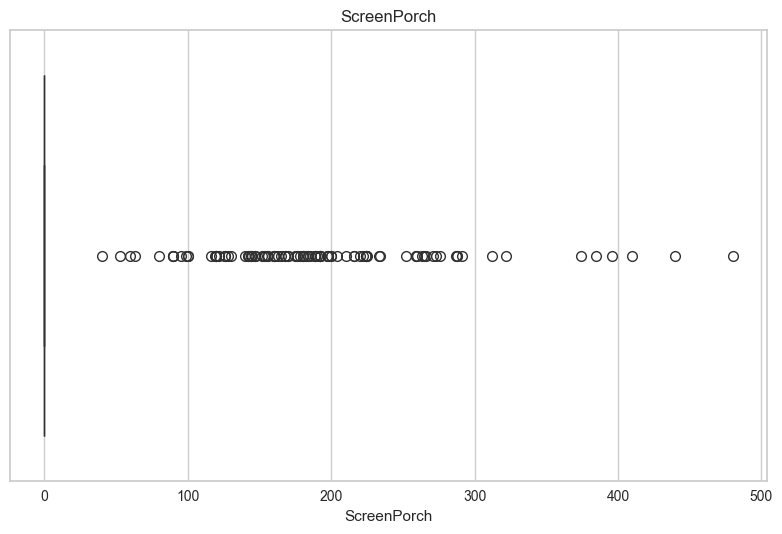

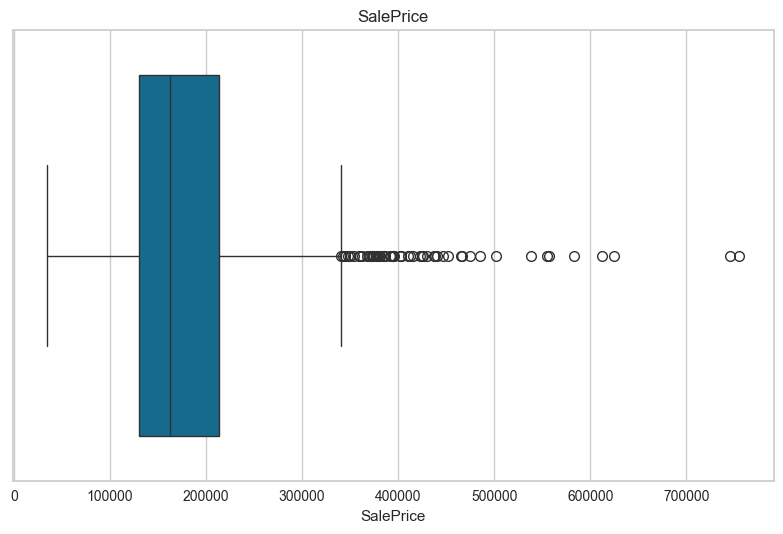

In [71]:
# aykırı değeri olan sutunların grfiğini çizmek
# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek


# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

In [72]:
# Sadece seçtiğimiz kolonları min-max ile baskılamak

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir

    
        
    return df

# Aykırı değerleri düzeltmek istediğiniz sütunları seçin
secilen_sutunlar = continuous_feature

# Aykırı değerleri düzelt
df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, secilen_sutunlar)

In [73]:
# aykırı değeri olan sutunların grfiğini çizmek
# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek


# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

LotFrontage sütununda aykırı değer bulunmamaktadır.
LotArea sütununda aykırı değer bulunmamaktadır.
MasVnrArea sütununda aykırı değer bulunmamaktadır.
BsmtFinSF1 sütununda aykırı değer bulunmamaktadır.
BsmtFinSF2 sütununda aykırı değer bulunmamaktadır.
BsmtUnfSF sütununda aykırı değer bulunmamaktadır.
TotalBsmtSF sütununda aykırı değer bulunmamaktadır.
1stFlrSF sütununda aykırı değer bulunmamaktadır.
2ndFlrSF sütununda aykırı değer bulunmamaktadır.
GrLivArea sütununda aykırı değer bulunmamaktadır.
GarageArea sütununda aykırı değer bulunmamaktadır.
WoodDeckSF sütununda aykırı değer bulunmamaktadır.
OpenPorchSF sütununda aykırı değer bulunmamaktadır.
EnclosedPorch sütununda aykırı değer bulunmamaktadır.
ScreenPorch sütununda aykırı değer bulunmamaktadır.
SalePrice sütununda aykırı değer bulunmamaktadır.


In [74]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF2, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

object Veri Türü Sütunları:
MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

float64 Veri Türü Sütunları:
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtUnfSF, 1stFlrSF, GrLivArea, GarageYrBlt, Garage

In [75]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'Alley',
                  'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' , 
                  'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
                  'MasVnrType','Foundation','Heating','MiscFeature']
le_dict = {}

for column in labelEncoder:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    le_dict[column] = le
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450.0,Pave,1,3,3,0,4,...,0,NA,4,1,0,2,2008,8,4,208500.0
1,0,3,80.0,9600.0,Pave,1,3,3,0,2,...,0,NA,4,1,0,5,2007,8,4,181500.0
2,5,3,68.0,11250.0,Pave,1,0,3,0,4,...,0,NA,4,1,0,9,2008,8,4,223500.0
3,6,3,60.0,9550.0,Pave,1,0,3,0,0,...,0,NA,4,1,0,2,2006,8,0,140000.0
4,5,3,84.0,14260.0,Pave,1,0,3,0,2,...,0,NA,4,1,0,12,2008,8,4,250000.0


In [76]:
df = pd.get_dummies(df, drop_first=True,dtype =int, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,5,3,65.0,8450.0,1,3,3,0,4,5,...,2008,8,4,208500.0,1,1,0,1,0,0
1,0,3,80.0,9600.0,1,3,3,0,2,24,...,2007,8,4,181500.0,1,1,0,1,0,0
2,5,3,68.0,11250.0,1,0,3,0,4,5,...,2008,8,4,223500.0,1,1,0,1,0,0
3,6,3,60.0,9550.0,1,0,3,0,0,6,...,2006,8,0,140000.0,1,1,0,1,0,0
4,5,3,84.0,14260.0,1,0,3,0,2,15,...,2008,8,4,250000.0,1,1,0,1,0,0


In [77]:
for col in ['GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC','KitchenQual', 'PoolQC', 'BsmtQual','BsmtCond', 'FireplaceQu']:
    df[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [78]:
result = sütunlari_veri_türune_gore_grupla(df)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtFinSF2, TotalBsmtSF, HeatingQC, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageCars, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscVal, MoSold, YrSold

int32 Veri Türü Sütunları:
MSZoning, Alley, LotShape, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, Electrical, Functional, GarageType, GarageFinish, Fence, MiscFeature, SaleType, SaleCondition, CentralAir_Y, Street_Pave, PavedDrive_P, PavedDrive_Y, LandSlope_Mod, LandSlope_Sev

float64 Veri Türü Sütunları:
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtUnfSF,

In [79]:
# İstediğimiz bir kolonun yerini değiştirip sona almak

yer_değiştir = df.pop('SalePrice')
df['SalePrice'] = yer_değiştir
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev,SalePrice
0,5,3,65.0,8450.0,1,3,3,0,4,5,...,2008,8,4,1,1,0,1,0,0,208500.0
1,0,3,80.0,9600.0,1,3,3,0,2,24,...,2007,8,4,1,1,0,1,0,0,181500.0
2,5,3,68.0,11250.0,1,0,3,0,4,5,...,2008,8,4,1,1,0,1,0,0,223500.0
3,6,3,60.0,9550.0,1,0,3,0,0,6,...,2006,8,0,1,1,0,1,0,0,140000.0
4,5,3,84.0,14260.0,1,0,3,0,2,15,...,2008,8,4,1,1,0,1,0,0,250000.0


In [80]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [81]:
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [82]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

FeatureImportances(ax=<Axes: >,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   topn=11)

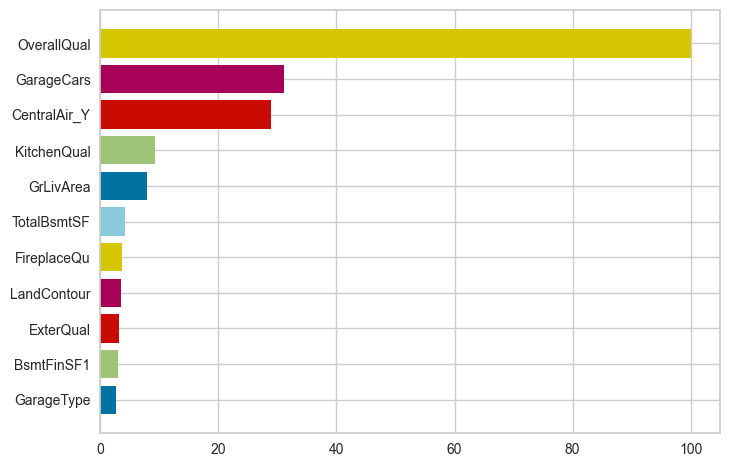

In [83]:
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances

column_names = x_train.columns.tolist()

regressor = XGBRegressor()

viz = FeatureImportances(regressor,topn=11)

viz.fit(x_train, y_train)

In [84]:
# Özellik isimlerini alın
feature_names = viz.features_

# İlk 11 özelliğin isimlerini alın
top_11_feature_names = feature_names[:11]

print(top_11_feature_names)

['GarageType' 'BsmtFinSF1' 'ExterQual' 'LandContour' 'FireplaceQu'
 'TotalBsmtSF' 'GrLivArea' 'KitchenQual' 'CentralAir_Y' 'GarageCars'
 'OverallQual']


In [85]:
df1 = df[["OverallQual","GarageCars","CentralAir_Y","KitchenQual","GrLivArea","TotalBsmtSF","FireplaceQu","LandContour","ExterQual","BsmtFinSF1","GarageType","SalePrice"]]

df1.head()

,OverallQual,GarageCars,CentralAir_Y,KitchenQual,GrLivArea,TotalBsmtSF,FireplaceQu,LandContour,ExterQual,BsmtFinSF1,GarageType,SalePrice
0,7,2,1,4,1710.0,856,0,3,4,706.0,1,208500.0
1,6,2,1,3,1262.0,1262,3,3,3,978.0,1,181500.0
2,7,2,1,4,1786.0,920,3,3,4,486.0,1,223500.0
3,7,3,1,4,1717.0,756,4,3,3,216.0,5,140000.0
4,8,3,1,4,2198.0,1145,3,3,4,655.0,1,250000.0


In [86]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [87]:
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [88]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [89]:
from xgboost import XGBRegressor
model = XGBRegressor(subsample=0.8,n_estimators=40,min_child_weight=2,max_depth=3,learning_rate=0.2,reg_lambda=2,gamma=0.2,colsample_bytree=0.9,alpha=1)
model.fit(x_train, y_train)

XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=40, n_jobs=None,
             num_parallel_tree=None, ...)

In [90]:
#Test verilerini kullanarak çıktıyı tahmin et
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [91]:
y_pred_df = pd.DataFrame(data=y_pred,columns=["Tahmini_Sonuc"])

In [92]:
y_test_df = pd.DataFrame(data=y_test,columns=["Gerçek_Sonuç"])

karsılastırma_df = pd.concat([y_test_df,y_pred_df],axis=1)
karsılastırma_df

,Gerçek_Sonuç,Tahmini_Sonuc
0,200624.0,250442.328125
1,133000.0,152092.625000
2,110000.0,131214.390625
3,192000.0,221152.296875
4,88000.0,92451.859375
...,...,...
287,324000.0,289163.687500
288,340037.5,328440.218750
289,136000.0,167637.796875
290,82500.0,74831.031250


In [93]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Ortalama Kare Hatası (Mean Squared Error - MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 16822.13966181507
Mean Squared Error (MSE): 542137192.6416413
Root Mean Squared Error (RMSE): 23283.839731488475


In [94]:

from sklearn.metrics import r2_score

x_train = r2_score(y_train, y_pred_train)
x_test = r2_score(y_test,y_pred)

print(f"Eğitim seti tahmin: {x_train}\n\nTest seti tahmin: {x_test}")

Eğitim seti tahmin: 0.9212350938855028

Test seti tahmin: 0.8759643182225482


### Save the model and top_11_feature_names

In [95]:
import joblib

# Modeli kaydet
joblib.dump(model, "model.joblib")

# Seçilen özellik isimlerini kaydet
joblib.dump(top_11_feature_names, "top_11_feature_names.joblib")

['top_11_feature_names.joblib']

In [96]:
# GarageType: Garaj Türü
"""
2Types: Birden fazla türde garaj
Attchd: Ev ile bağlantılı (Eve bitişik)
Basment: Bodrum Katında Garaj
BuiltIn: Ev İçine Yapılmış (Evin bir parçası olan garaj - genellikle garajın üstünde oda bulunur)
CarPort: Araba Portu
Detchd: Evden ayrı (Evden ayrılmış)
NA: Garaj Yok

"""

"""
BsmtFinSF1" = s birincil bitmiş alanın (Type 1) metrekare cinsinden alanını temsil eder.

"""

# ExterQual: Dış Yüzey Kalitesi
"""
Ex: Mükemmel
Gd: İyi
TA: Ortalama/Tipik
Fa: Orta
Po: Zayıf

"""


# LandContour: Arazi Konturu
"""
ArithmeticErrorLvl: Yaklaşık Düz/Seviye
Bnk: Yamaçlı - Cadde seviyesinden binaya hızlı ve belirgin bir yükselme
HLS: Yamaç - Yandan yana belirgin eğim
Low: Alçaklık

"""

# FireplaceQu: Şömine Kalitesi
"""
Ex: Mükemmel - Olağanüstü Tuğla Şömine
Gd: İyi - Ana Kat Seviyesinde Tuğla Şömine
TA: Ortalama - Ana Yaşam Alanında Prefabrike Şömine veya Bodrum Katında Tuğla Şömine
Fa: Orta - Bodrum Katında Prefabrike Şömine
Po: Zayıf - Ben Franklin Şöminesi
NA: Şömine Yok

"""

# TotalBsmtSF: Toplam Bodrum Katı Alanı

# GrLivArea: Zemin Üstü Yaşam Alanı

# KitchenQual: Mutfak Kalitesi
"""
Ex: Mükemmel(Excellent)
Gd: İyi(Good)
TA: Tipik/Ortalama(Typical/Average)
Fa: Adil(Fair)
Po: Kötü (Poor)
"""

# CentralAir_Y: Merkezi Klima (Var/Yok)

# GarageCars: Garaj Kapasitesi (Araba Sayısı)

# OverallQual: Genel Kalite Değeri(1-10 arasında)

'\nEx: Mükemmel(Excellent)\nGd: İyi(Good)\nTA: Tipik/Ortalama(Typical/Average)\nFa: Adil(Fair)\nPo: Kötü (Poor)\n'

## Real-time Prediction

### Load feature names

In [97]:
import joblib

# Özellik isimlerini yükleme
top_11_feature_names = joblib.load("top_11_feature_names.joblib")
top_11_feature_names

array(['GarageType', 'BsmtFinSF1', 'ExterQual', 'LandContour',
       'FireplaceQu', 'TotalBsmtSF', 'GrLivArea', 'KitchenQual',
       'CentralAir_Y', 'GarageCars', 'OverallQual'], dtype=object)

In [98]:
df1 = df[["OverallQual","GarageCars","CentralAir_Y","KitchenQual","GrLivArea","TotalBsmtSF","FireplaceQu","LandContour","ExterQual","BsmtFinSF1","GarageType","SalePrice"]]

df1.head()

,OverallQual,GarageCars,CentralAir_Y,KitchenQual,GrLivArea,TotalBsmtSF,FireplaceQu,LandContour,ExterQual,BsmtFinSF1,GarageType,SalePrice
0,7,2,1,4,1710.0,856,0,3,4,706.0,1,208500.0
1,6,2,1,3,1262.0,1262,3,3,3,978.0,1,181500.0
2,7,2,1,4,1786.0,920,3,3,4,486.0,1,223500.0
3,7,3,1,4,1717.0,756,4,3,3,216.0,5,140000.0
4,8,3,1,4,2198.0,1145,3,3,4,655.0,1,250000.0


In [99]:
df1.ExterQual.unique()

array([4, 3, 5, 2], dtype=int64)

In [100]:
df.ExterQual.unique()

array([4, 3, 5, 2], dtype=int64)

### Input new data

In [101]:
sample_one = [{
"OverallQual":7,
"GarageCars":2,
"CentralAir_Y":1,
"KitchenQual":0,
"GrLivArea":1710,
"TotalBsmtSF":856,
"FireplaceQu":5,
"LandContour":3,
"ExterQual":3,
"BsmtFinSF1":700,
"GarageType":4 }]

In [102]:
df_s = pd.DataFrame(sample_one)
df_s

,OverallQual,GarageCars,CentralAir_Y,KitchenQual,GrLivArea,TotalBsmtSF,FireplaceQu,LandContour,ExterQual,BsmtFinSF1,GarageType
0,7,2,1,0,1710,856,5,3,3,700,4


### Load Model

In [103]:
model = joblib.load("model.joblib")

### Predict

In [104]:
pred_price = round(model.predict(df_s)[0])
print(f"Your car's price: ${pred_price}")

Your car's price: $182250
